# **Dimensionality Reduction**

## **Filler Text**



The assignment, DSAN-5000 Homework-4, is divided into two main parts: Dimensionality Reduction and Clustering. Let's go through each part step-by-step and address the tasks using the provided dataset.

### Part 1: Dimensionality Reduction
This part focuses on applying and comparing two dimensionality reduction techniques: PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding).

#### Tasks for Dimensionality Reduction:
1. **PCA**:
   - Apply PCA to your dataset.
   - Determine the optimal number of principal components to retain.
   - Visualize the reduced-dimensional data using PCA.
   - Analyze and interpret the results.

2. **t-SNE**:
   - Implement t-SNE on the same dataset.
   - Explore different perplexity values and their impact.
   - Visualize the t-SNE output to reveal patterns and clusters.
   - Compare t-SNE results with PCA results.

3. **Evaluation and Comparison**:
   - Evaluate the effectiveness of PCA and t-SNE in terms of preserving data structure and information.
   - Compare the visualization capabilities of PCA and t-SNE.
   - Discuss the trade-offs and scenarios where one technique may outperform the other.

### Part 2: Clustering
This part involves applying k-means, DBSCAN, and Hierarchical clustering to portions of your dataset.

#### Tasks for Clustering:
1. **Clustering Analysis**:
   - Apply k-means, DBSCAN, and Hierarchical clustering.
   - Document the process, including data selection, feature selection, hyper-parameter tuning, and final results.
   - Use visualizations to support your analysis.

2. **Evaluation of Results**:
   - Discuss and compare the results of the various clustering methods.
   - Explore connections between the clustering results and any existing labels in the dataset.

3. **Conclusions**:
   - Summarize key findings and their implications in a non-technical manner.

---

Let's start with the first part, Dimensionality Reduction, focusing on PCA. We will first load your dataset, apply PCA, determine the optimal number of components, and visualize the results. Please provide any specific instructions or details about your dataset if necessary.

The dataset contains various features, including device names, company information, financial metrics, and clearance types. For the PCA analysis, we should focus on numerical features, as PCA is typically applied to quantitative data. 

From the dataset, it looks like the financial metrics such as `CostOfGoodsAndServicesSold`, `GrossProfit`, `OperatingExpenses`, `ResearchAndDevelopmentExpense`, `SellingGeneralAndAdministrativeExpense`, `OperatingIncomeLoss`, `NetIncomeLoss`, `EarningsPerShareBasic`, and `ConsolidatedRevenue` are suitable for PCA.

Let's proceed with the following steps for PCA:
1. **Data Preparation**: Isolate the numerical features for PCA.
2. **PCA Implementation**: Apply PCA to these features.
3. **Optimal Components**: Determine the optimal number of principal components.
4. **Visualization**: Visualize the reduced-dimensional data.
5. **Interpretation**: Analyze and interpret the results.

We will begin with the data preparation step. Let's isolate the numerical features and standardize them, which is a common practice before applying PCA.

The numerical features have been standardized, which is important for PCA as it ensures that each feature contributes equally to the analysis.

Now, let's move on to the PCA implementation:

1. **Apply PCA**: We'll initially apply PCA without specifying the number of components to observe the variance explained by each component.
2. **Determine Optimal Components**: We'll analyze the variance explained by the principal components to determine the optimal number to retain.
3. **Visualize PCA Results**: We'll create a scree plot to visualize the variance explained by each principal component, which aids in selecting the optimal number.

Let's proceed with applying PCA to the scaled data.

The scree plot and the variance explained by each principal component provide valuable insights:

1. **Scree Plot Analysis**: The plot shows a clear elbow after the first few components, indicating that these components capture most of the variance in the data.
2. **Variance Explained**:
   - The first principal component explains approximately \(80.65\%\) of the variance.
   - The second component explains \(11.27\%\), and the third explains \(4.68\%\).

Based on this information, a common approach is to choose the number of components that add up to a significant portion of the variance (often around \(95\%\)). Here, the first three components together explain over \(96\%\) of the variance, which seems sufficient for a comprehensive representation of the data.

Now, let's visualize the data in the reduced-dimensional space formed by the first two principal components (as they explain the majority of the variance). This visualization will help us understand the structure of the data in the lower-dimensional space. 

Let's create a 2D scatter plot using the first two principal components.

The scatter plot visualizes the data in the reduced-dimensional space defined by the first two principal components from PCA. Each point in this plot represents a record in your dataset, transformed into this new space.

### Interpretation of PCA Results:
1. **Data Spread**: The plot shows how the data is spread along the first two principal components. These components are linear combinations of the original features and capture the most significant patterns in the data.
2. **Clusters and Patterns**: If there are any apparent clusters or patterns, they might indicate underlying relationships in the data. However, in this plot, the data points do not form distinct clusters, suggesting that the variance captured by these components does not correspond to discrete groupings.

### Next Steps:
- We can proceed to apply t-SNE to the same dataset and compare the results with PCA.
- Before applying t-SNE, it would be good to know if you have any specific perplexity values in mind to explore or if you'd like me to choose a range of values.

Please let me know how you'd like to proceed or if there are any specific aspects of the PCA results you'd like to discuss further!

## **Project Proposal**

### **Introduction**

## **Code Implementation**

### **Data preparation**

In [51]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [52]:
# Reading in the data
df = pd.read_csv('../data-cleaning/outputs/imputed.csv')

# Quick look at the data
df

,device_name,SEC_name,state,CIK,financial_year,advisory_committee_description,clearance_type,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic,ConsolidatedRevenue
0,CONFIRM BIOACTIVE,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,1.108570e+08,3.635140e+08,2.324430e+08,3.168700e+07,1.877980e+08,1.383620e+08,9.248500e+07,0.980000,4.743710e+08
1,SILC FIXATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,1.108570e+08,3.635140e+08,2.324430e+08,3.168700e+07,1.877980e+08,1.383620e+08,9.248500e+07,0.980000,4.743710e+08
2,REVERE STABILIZATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,1.108570e+08,3.635140e+08,2.324430e+08,3.168700e+07,1.877980e+08,1.383620e+08,9.248500e+07,0.980000,4.743710e+08
3,SUSTAIN AND SUSTAIN RADIOLUCENT SPACERS,"GLOBUS MEDICAL, INC.",PA,1237831,2013.0,Orthopedic,Traditional,1.003430e+08,3.341160e+08,2.324430e+08,2.792600e+07,1.825180e+08,1.147930e+08,7.383100e+07,0.820000,4.344590e+08
4,COALITION SPACER,"GLOBUS MEDICAL, INC.",PA,1237831,2013.0,Orthopedic,Traditional,1.003430e+08,3.341160e+08,2.324430e+08,2.792600e+07,1.825180e+08,1.147930e+08,7.383100e+07,0.820000,4.344590e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Palladium High Flow Therapy System,"Vapotherm, Inc.",NH,1253176,2019.0,Anesthesiology,Traditional,2.679300e+07,2.131100e+07,6.947500e+07,1.337600e+07,5.609900e+07,-4.816400e+07,-5.105900e+07,-7.598571,4.810400e+07
520,"Indigo System Aspiration Catheter 12, Indigo A...","Penumbra, Inc",CA,1321732,2020.0,Cardiovascular,Traditional,1.884480e+08,3.719640e+08,3.771170e+08,9.004900e+07,2.870680e+08,4.750800e+07,4.845800e+07,1.390000,5.604120e+08
521,BENCHMARK BMX81 Access System,"Penumbra, Inc",CA,1321732,2022.0,Cardiovascular,Traditional,3.119260e+08,5.352070e+08,5.291250e+08,7.940700e+07,4.497180e+08,-3.894200e+07,-2.463300e+07,-0.660000,8.471330e+08
522,Cerner CareAware Event Management,CERNER CORPORATION,MO,804753,2015.0,Cardiovascular,Traditional,7.507810e+08,3.674486e+09,2.893350e+09,5.627000e+08,1.183814e+09,7.811360e+08,5.393620e+08,1.570000,4.425267e+09


In [53]:
df.describe()

,CIK,financial_year,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic,ConsolidatedRevenue
count,5.240000e+02,524.000000,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,5.240000e+02,524.000000,5.240000e+02
mean,8.875991e+05,2016.129771,4.102409e+09,3.148158e+09,1.808084e+09,5.176914e+08,1.305361e+09,1.446103e+09,1.197573e+09,-0.599237,7.667055e+09
std,5.490020e+05,3.553787,1.773725e+10,1.139691e+10,3.988183e+09,1.806702e+09,2.383160e+09,7.944619e+09,6.712140e+09,14.409763,3.004724e+10
min,8.818000e+03,2009.000000,-1.200000e+07,-1.780200e+07,3.178000e+06,2.000000e+05,2.000000e+05,-9.062000e+08,-1.172800e+09,-248.220000,2.200000e+04
25%,3.432285e+05,2013.000000,5.053457e+07,8.604825e+07,9.513150e+07,2.263500e+07,7.462775e+07,-2.336600e+07,-2.934500e+07,-0.708571,1.694693e+08
50%,1.035267e+06,2016.000000,1.855980e+08,2.563735e+08,2.324430e+08,4.453200e+07,1.888823e+08,2.627400e+07,3.573514e+07,0.555000,4.012920e+08
75%,1.289850e+06,2019.000000,2.210000e+09,4.060970e+09,2.395109e+09,4.940000e+08,1.851774e+09,1.374500e+09,1.263271e+09,4.790000,7.708382e+09
max,1.833769e+06,2023.000000,2.235460e+11,1.707820e+11,5.134500e+10,2.625100e+10,2.509400e+10,1.194370e+11,9.980300e+10,19.210000,3.943280e+11


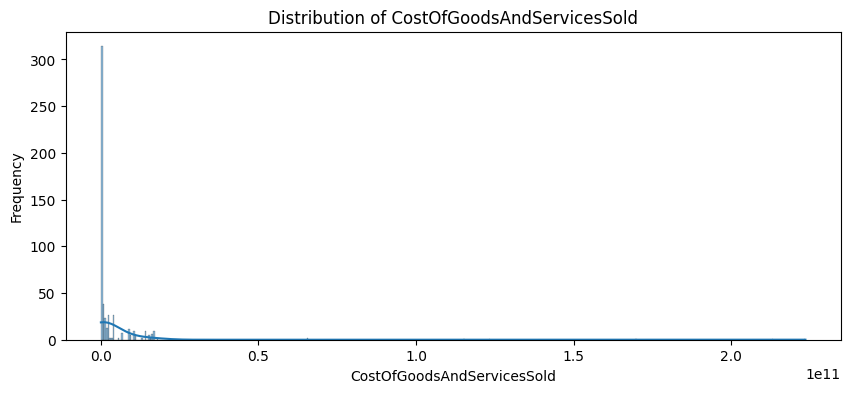

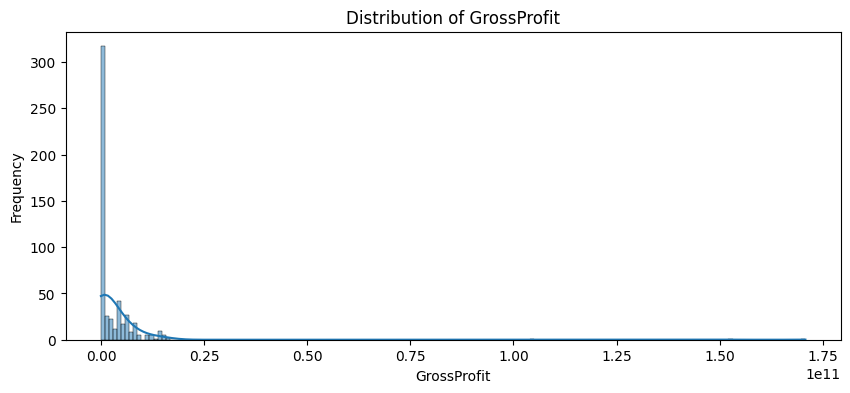

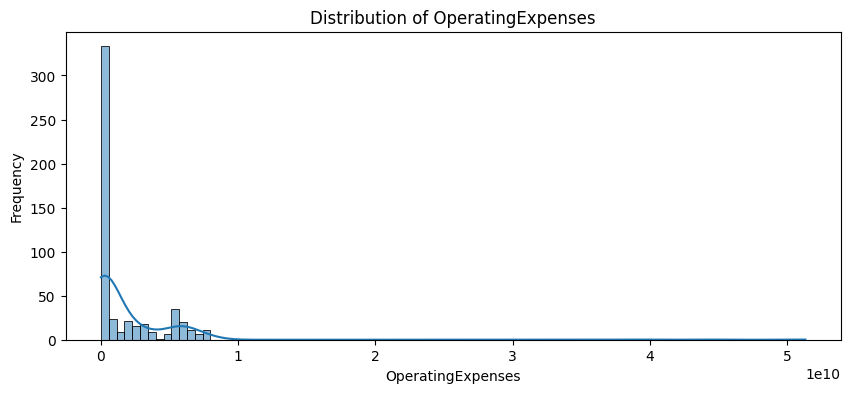

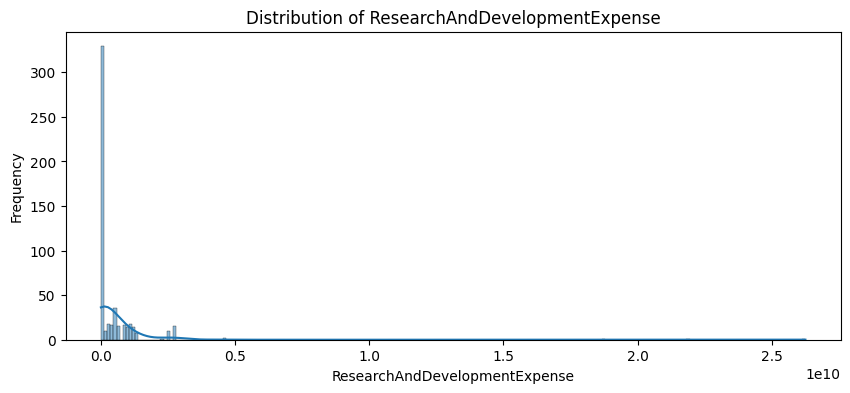

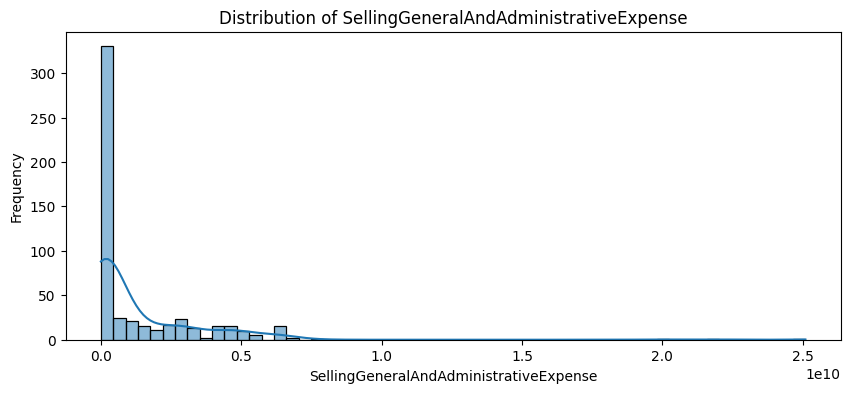

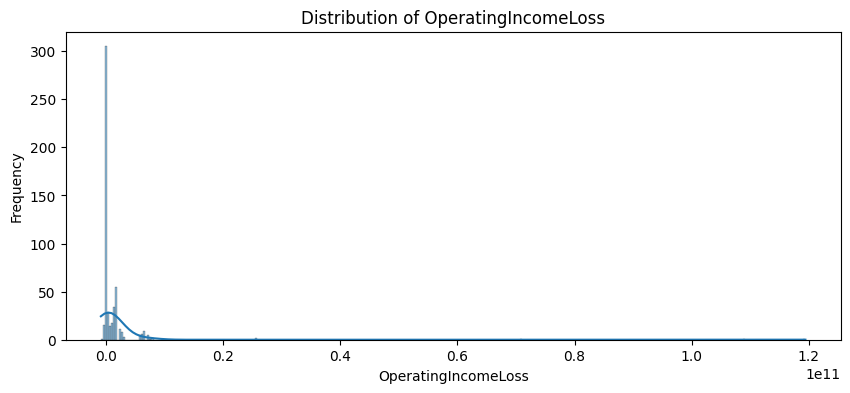

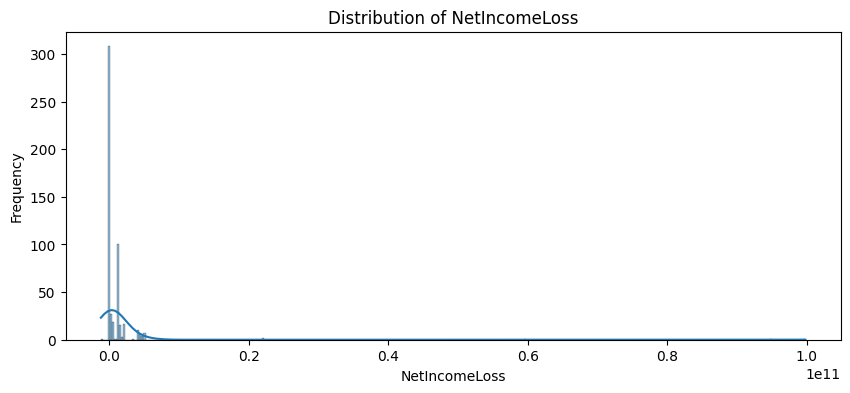

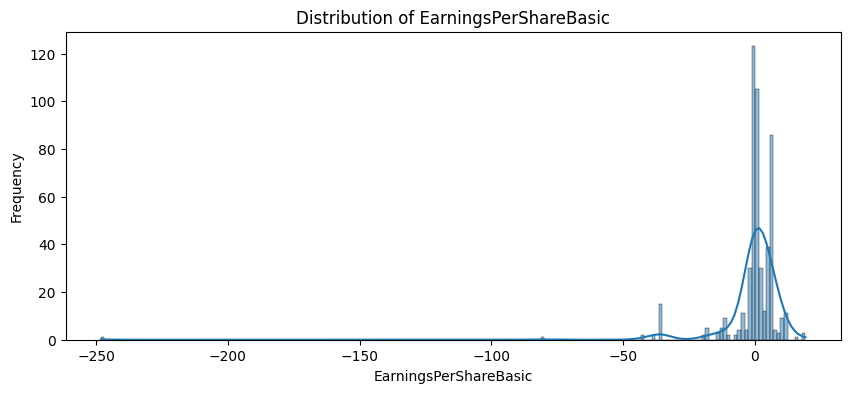

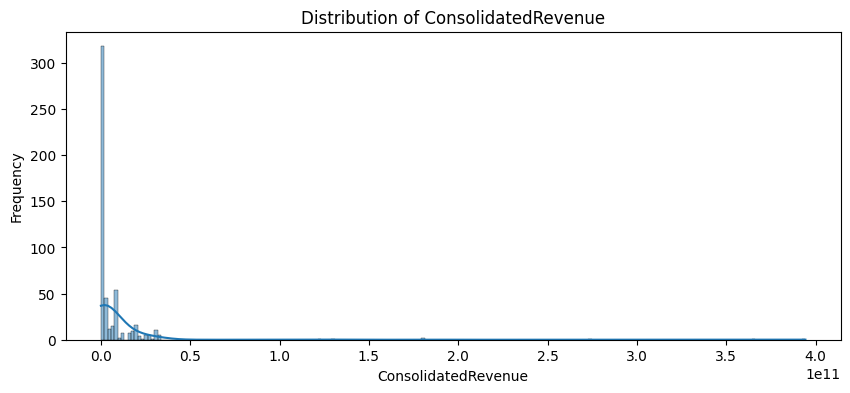

In [54]:
for col in df[df.columns[7:]]:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

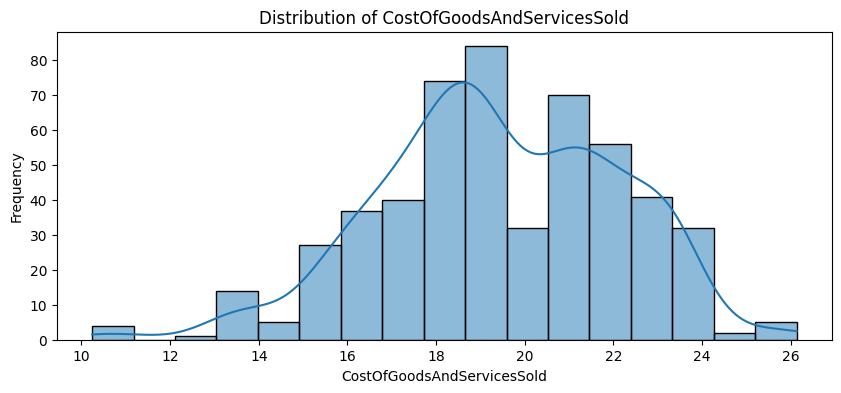

/Users/dsan/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


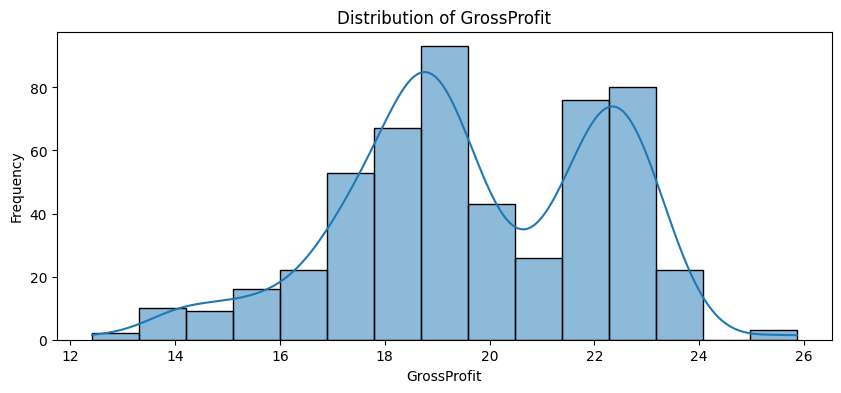

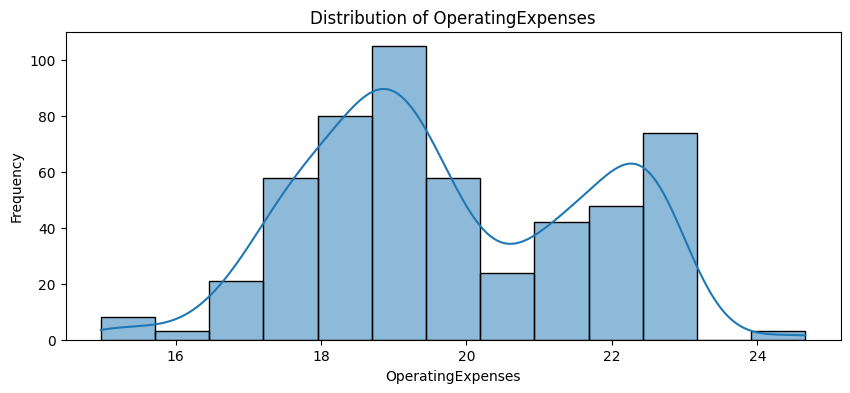

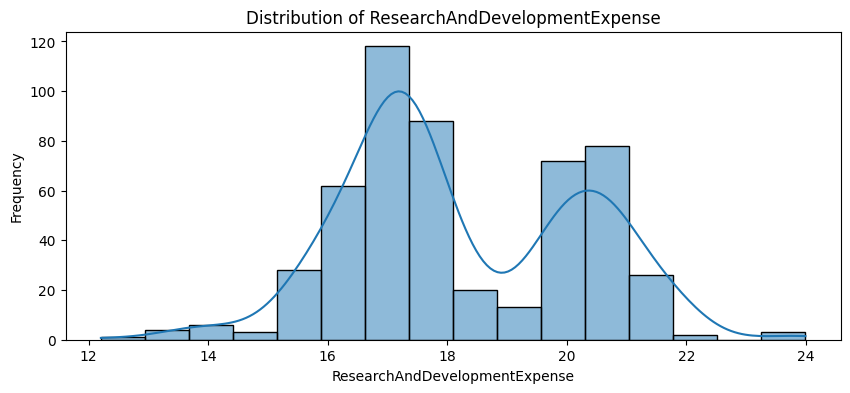

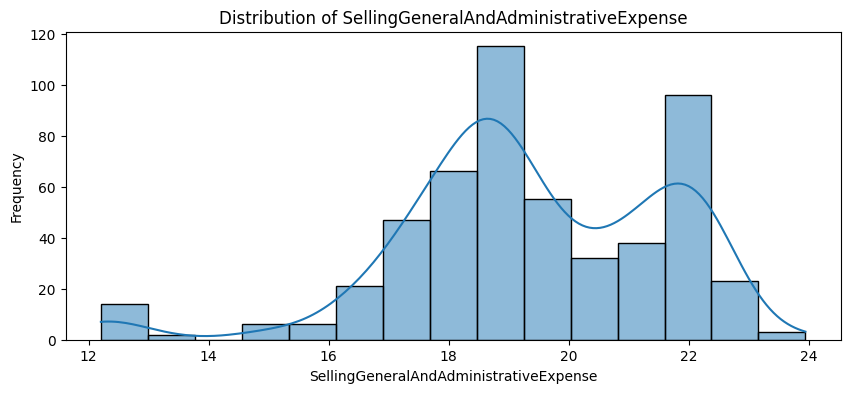

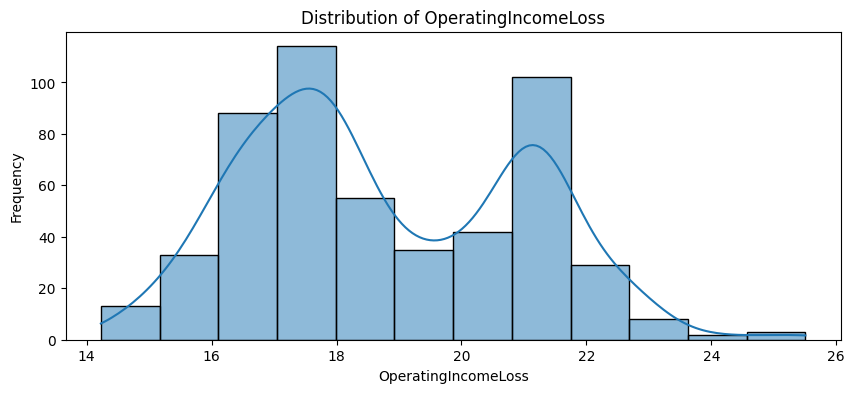

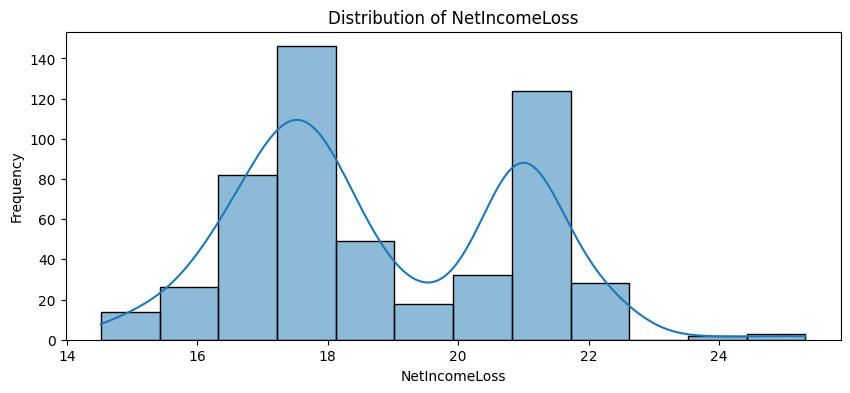

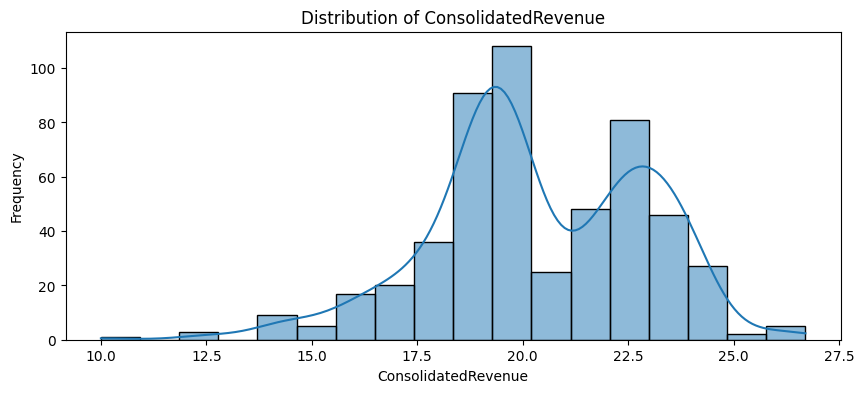

In [55]:
# Applying log scale 

log_features = ["CostOfGoodsAndServicesSold","GrossProfit", 
                "OperatingExpenses","ResearchAndDevelopmentExpense", 
                "SellingGeneralAndAdministrativeExpense","OperatingIncomeLoss",
                "NetIncomeLoss", "ConsolidatedRevenue"]

for col in df[log_features]:
    df[col] = np.abs(df[col])
    df[col] = np.log(df[col])
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [57]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

inf_check = np.isinf(df[log_features]).any()
print(inf_check)

CostOfGoodsAndServicesSold                False
GrossProfit                               False
OperatingExpenses                         False
ResearchAndDevelopmentExpense             False
SellingGeneralAndAdministrativeExpense    False
OperatingIncomeLoss                       False
NetIncomeLoss                             False
ConsolidatedRevenue                       False
dtype: bool


In [58]:
df.reset_index(drop=True)
df

,device_name,SEC_name,state,CIK,financial_year,advisory_committee_description,clearance_type,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic,ConsolidatedRevenue
0,CONFIRM BIOACTIVE,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,18.523752,19.711328,19.264156,17.271417,19.050877,18.745384,18.342557,0.980000,19.977500
1,SILC FIXATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,18.523752,19.711328,19.264156,17.271417,19.050877,18.745384,18.342557,0.980000,19.977500
2,REVERE STABILIZATION SYSTEM,"GLOBUS MEDICAL, INC.",PA,1237831,2014.0,Orthopedic,Traditional,18.523752,19.711328,19.264156,17.271417,19.050877,18.745384,18.342557,0.980000,19.977500
3,SUSTAIN AND SUSTAIN RADIOLUCENT SPACERS,"GLOBUS MEDICAL, INC.",PA,1237831,2013.0,Orthopedic,Traditional,18.424105,19.626999,19.264156,17.145069,19.022359,18.558641,18.117289,0.820000,19.889612
4,COALITION SPACER,"GLOBUS MEDICAL, INC.",PA,1237831,2013.0,Orthopedic,Traditional,18.424105,19.626999,19.264156,17.145069,19.022359,18.558641,18.117289,0.820000,19.889612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Palladium High Flow Therapy System,"Vapotherm, Inc.",NH,1253176,2019.0,Anesthesiology,Traditional,17.103651,16.874734,18.056478,16.408973,17.842629,17.690122,17.748492,-7.598571,17.688876
520,"Indigo System Aspiration Catheter 12, Indigo A...","Penumbra, Inc",CA,1321732,2020.0,Cardiovascular,Traditional,19.054333,19.734308,19.748066,18.315865,19.475230,17.676409,17.696208,1.390000,20.144183
521,BENCHMARK BMX81 Access System,"Penumbra, Inc",CA,1321732,2022.0,Cardiovascular,Traditional,19.558277,20.098164,20.086735,18.190097,19.924131,17.477584,17.019598,-0.660000,20.557368
522,Cerner CareAware Event Management,CERNER CORPORATION,MO,804753,2015.0,Cardiovascular,Traditional,20.436625,22.024679,21.785681,20.148257,20.892008,20.476260,20.105898,1.570000,22.210596


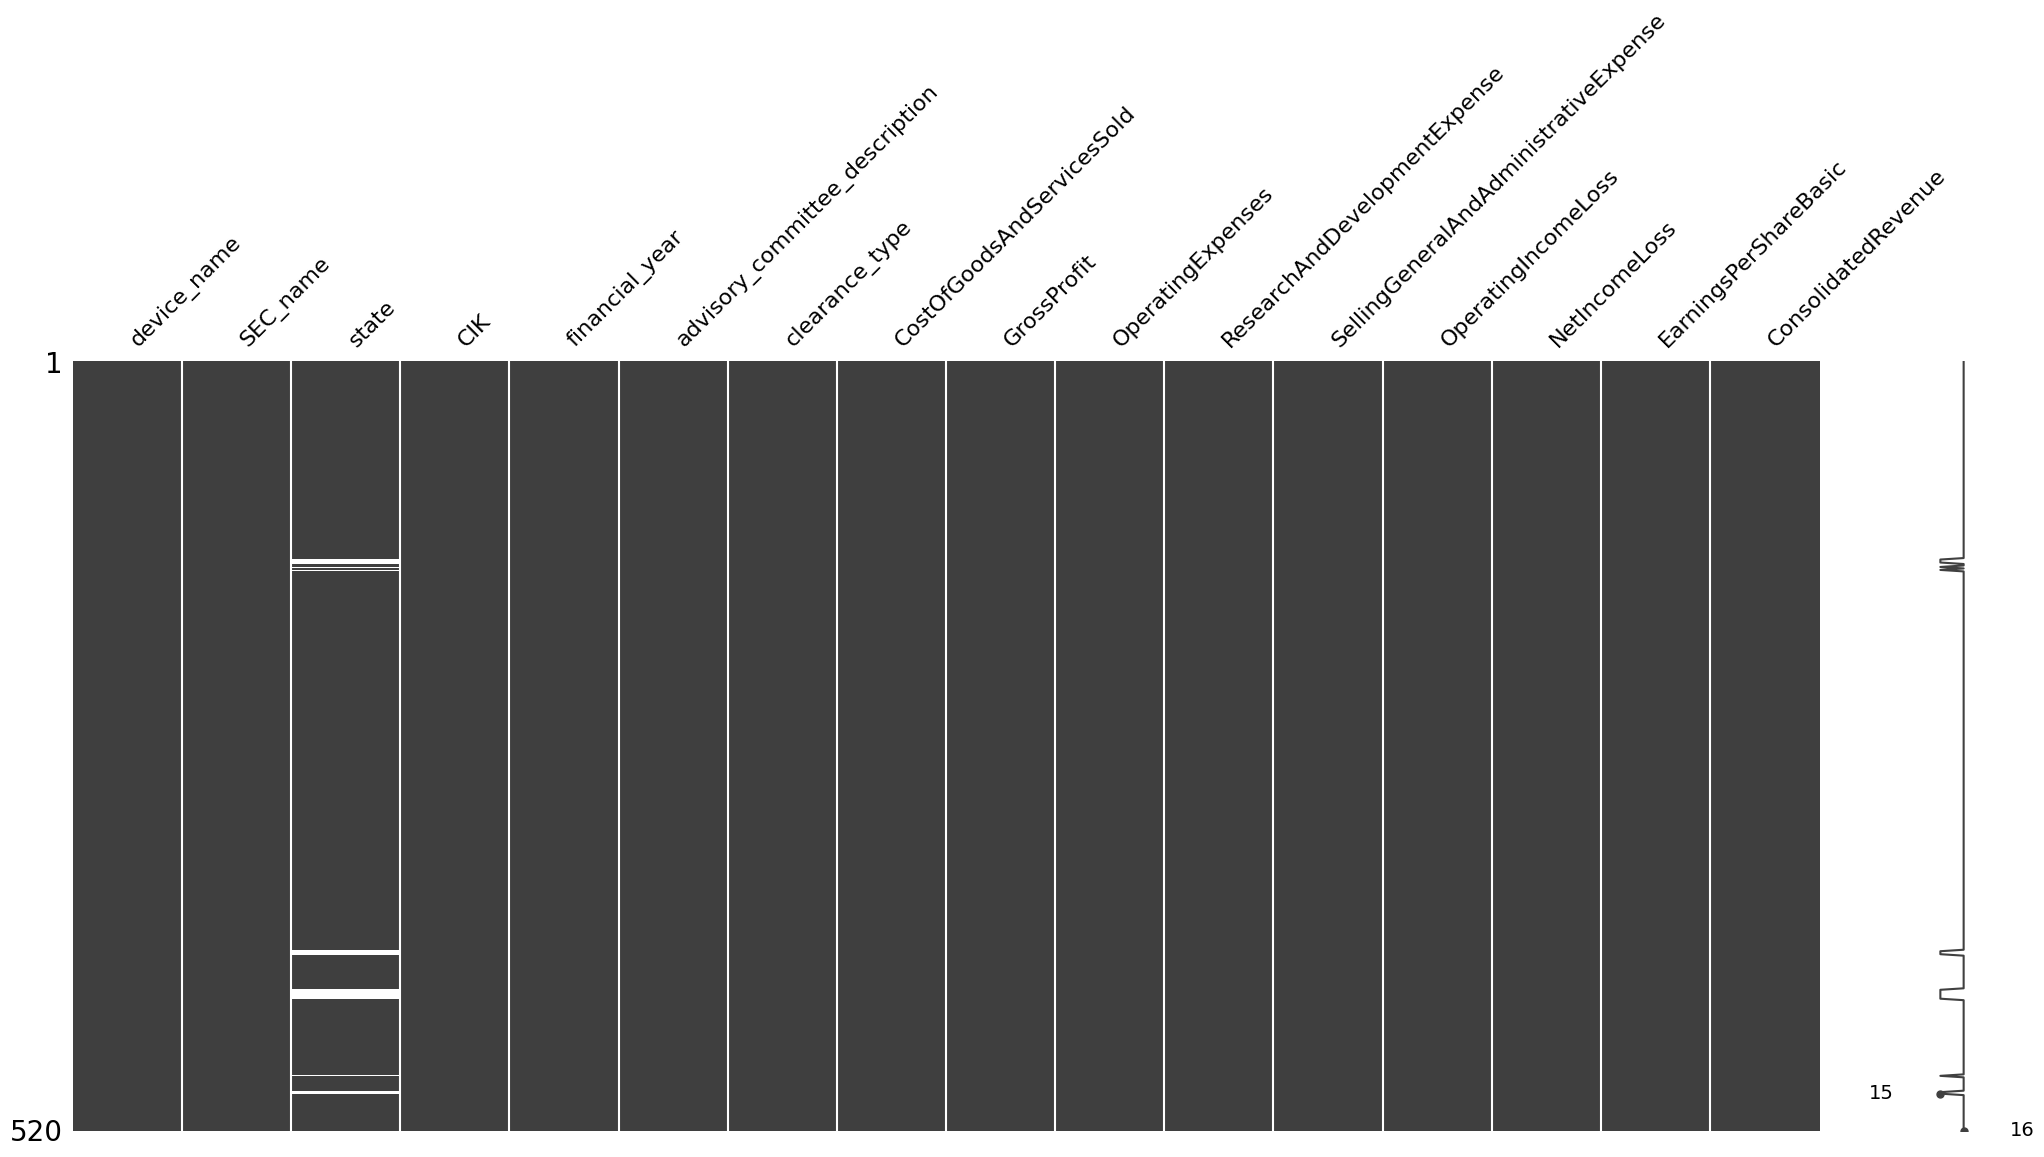

In [60]:
import missingno as msno

features = ['CostOfGoodsAndServicesSold',
                         'GrossProfit', 
                         'OperatingExpenses',
                         'ResearchAndDevelopmentExpense',
                         'SellingGeneralAndAdministrativeExpense', 
                         'OperatingIncomeLoss',
                         'NetIncomeLoss',
                         'EarningsPerShareBasic', 
                         'ConsolidatedRevenue']


# Standardizing the feature space using sklearn's StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])        # returns a numpy array, so will convert to pandas dataframe for future convenience

# Quick View of the scaled features as a dataframe 
scaled_features_df = pd.DataFrame(scaled_features, columns=features)
scaled_features_df


df = df.drop(features, axis=1)
df = df.merge(scaled_features_df, left_index=True, right_index=True)
df.dropna(subset=['GrossProfit'], inplace=True)
msno.matrix(df)

df.to_csv('outputs/model.csv', index=False)

In [53]:
inf_check = np.isinf(features).any()
print(inf_check)

CostOfGoodsAndServicesSold                False
GrossProfit                                True
OperatingExpenses                         False
ResearchAndDevelopmentExpense             False
SellingGeneralAndAdministrativeExpense    False
OperatingIncomeLoss                       False
NetIncomeLoss                             False
EarningsPerShareBasic                     False
ConsolidatedRevenue                       False
dtype: bool


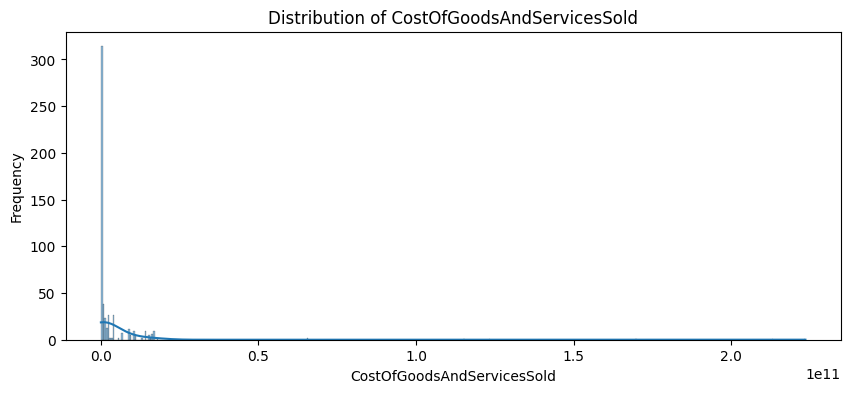

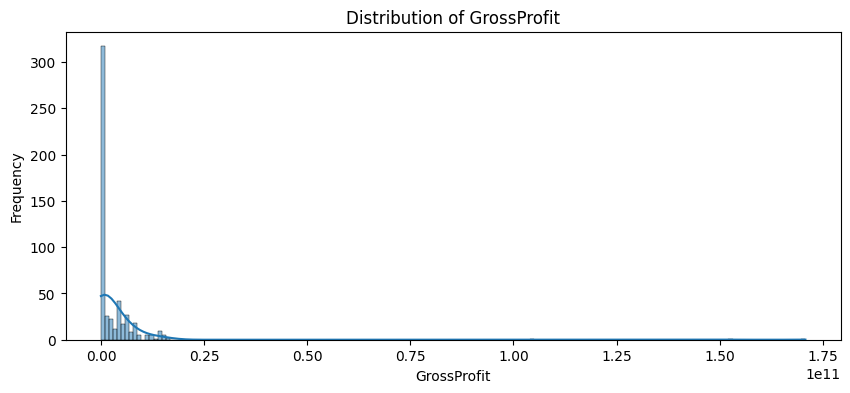

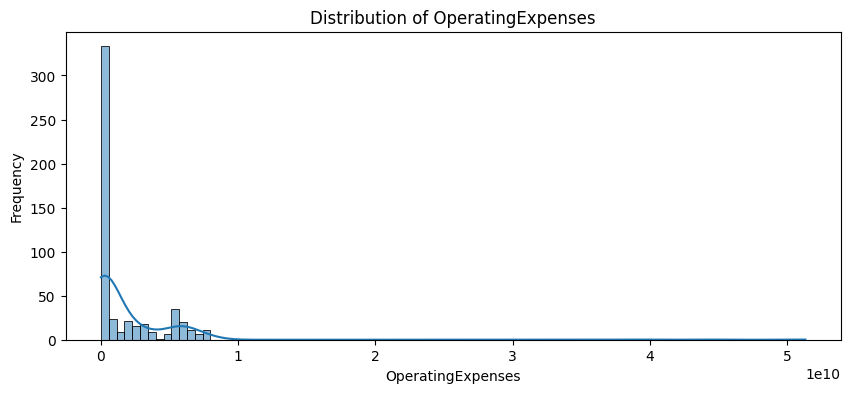

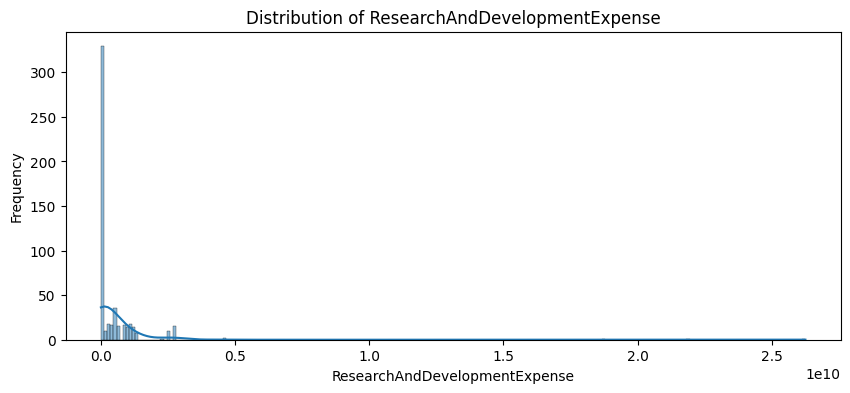

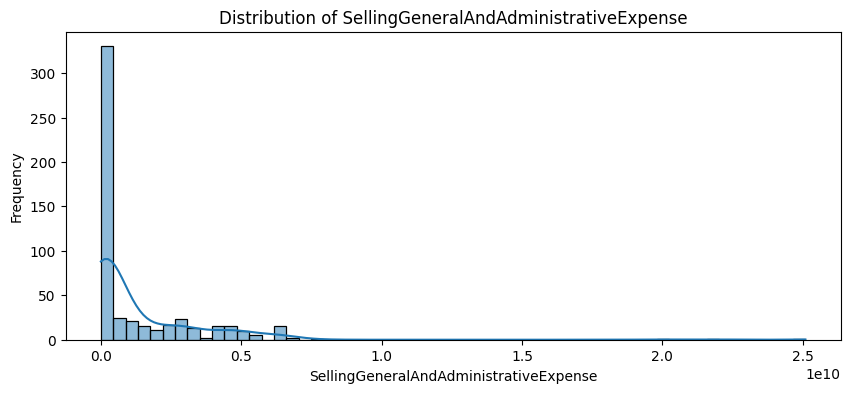

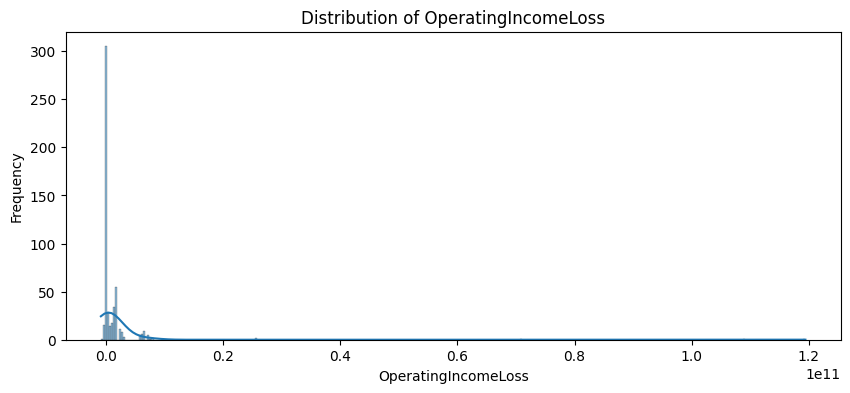

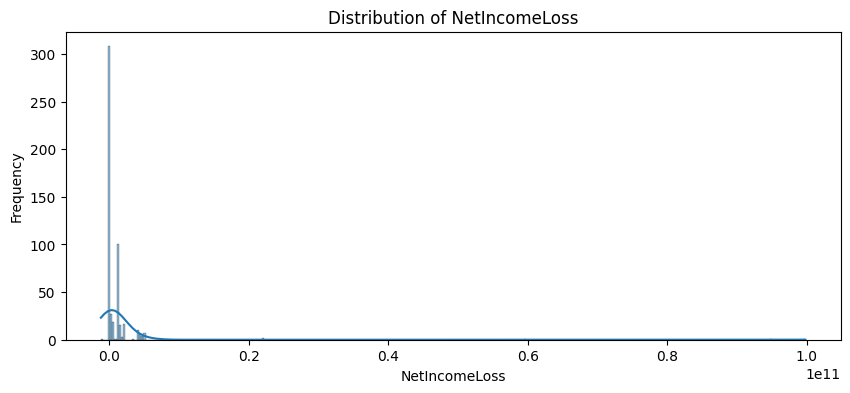

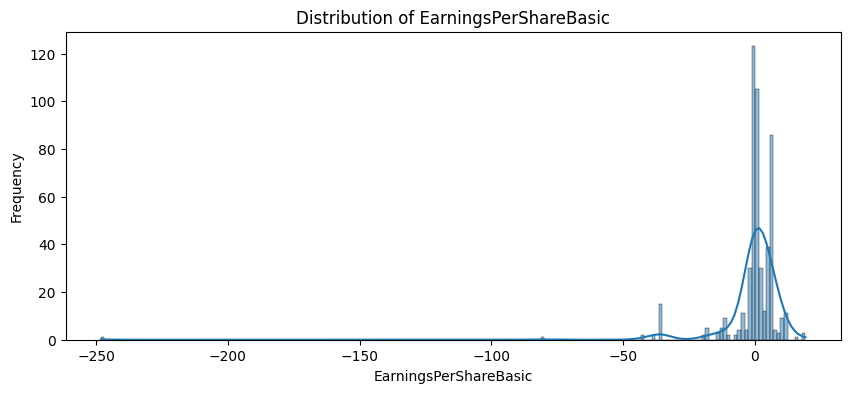

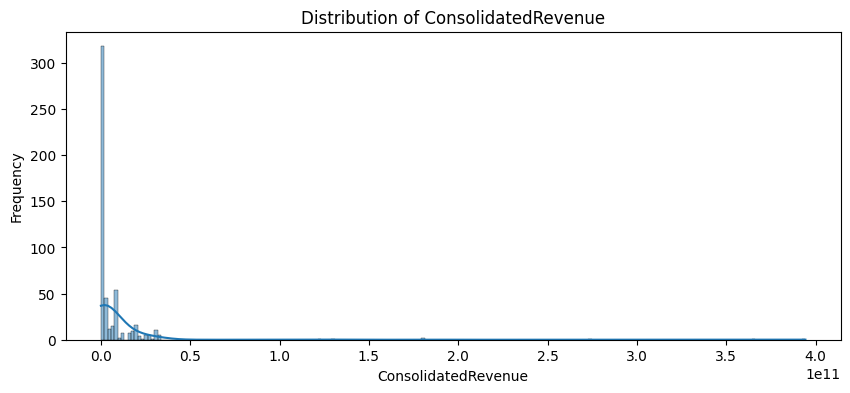

In [47]:
for col in features.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(features[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### **Log-Scaling Skewed Features**

In [ ]:
log_features = 

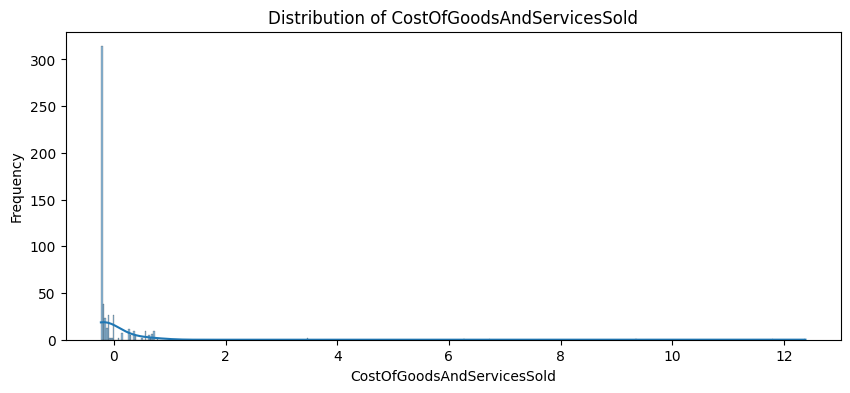

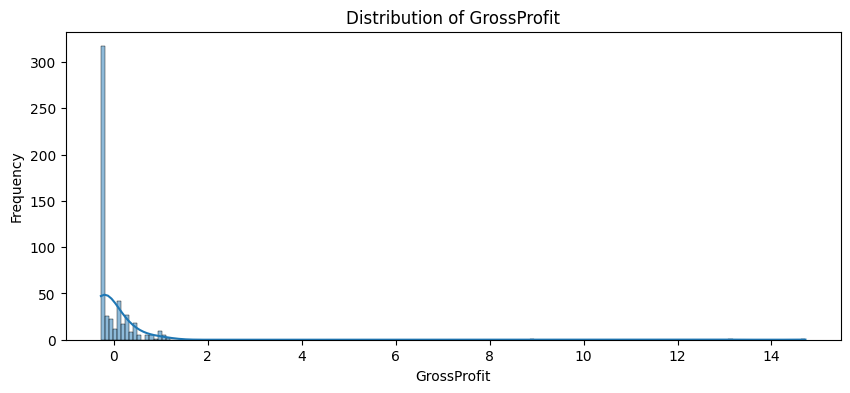

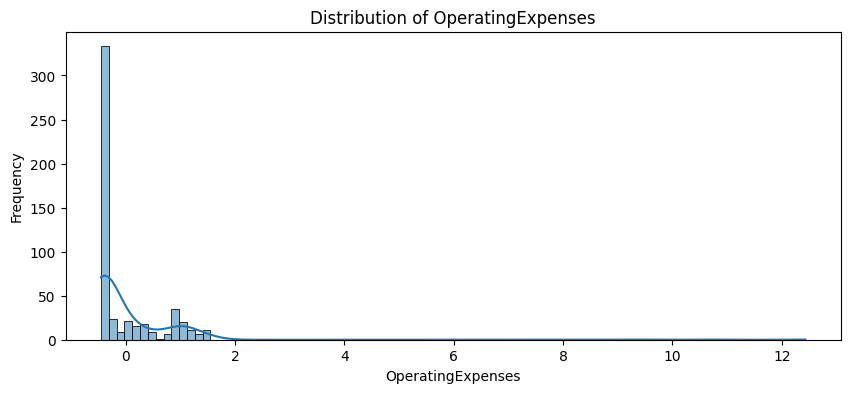

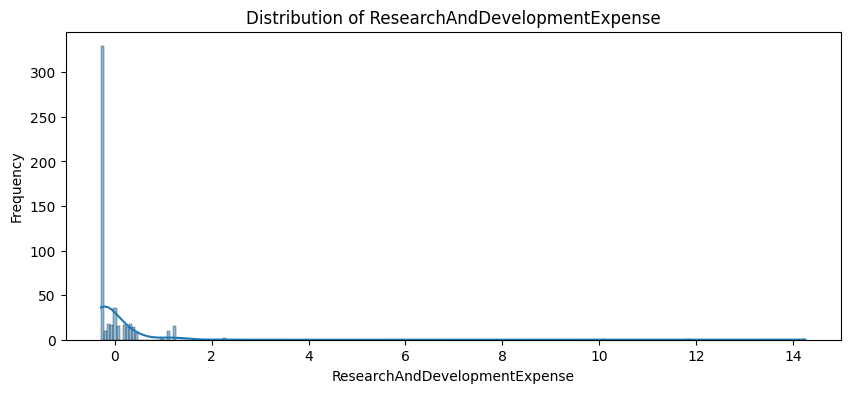

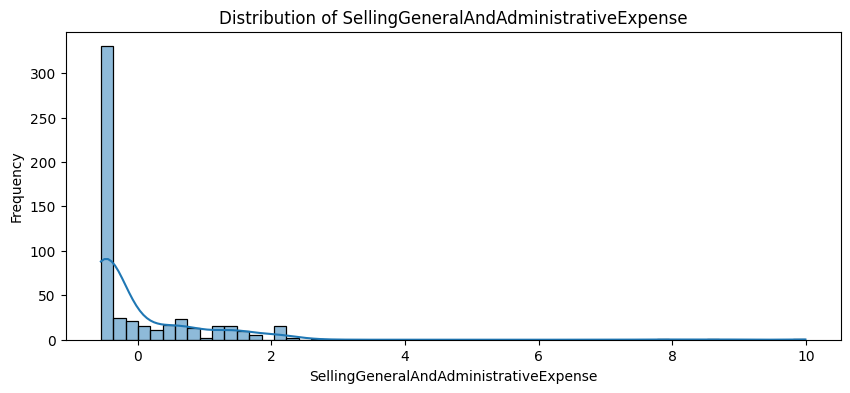

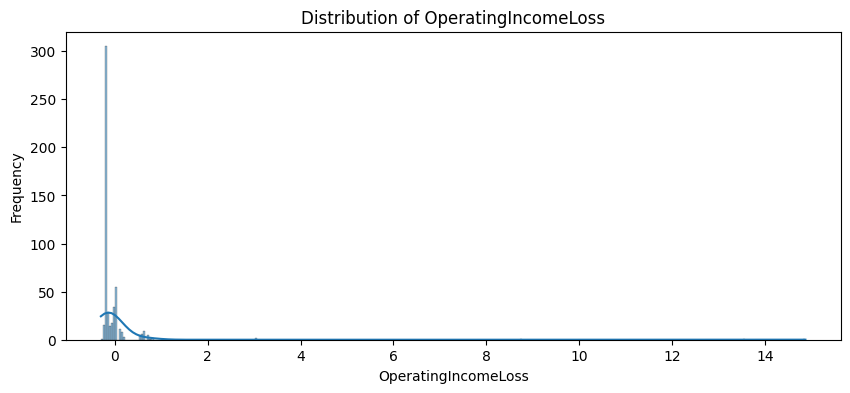

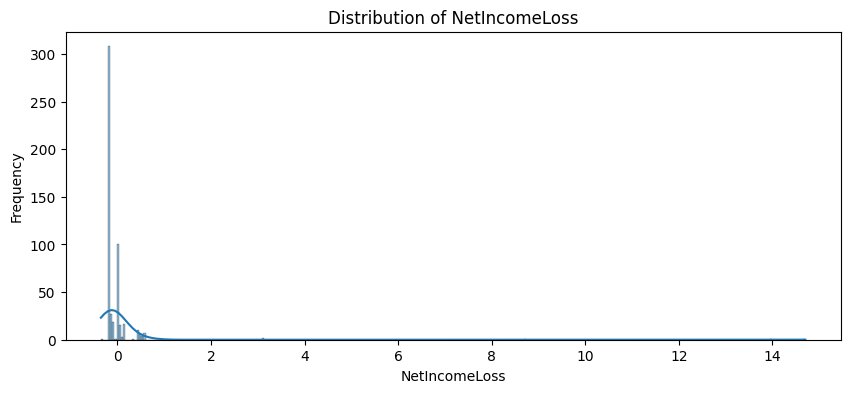

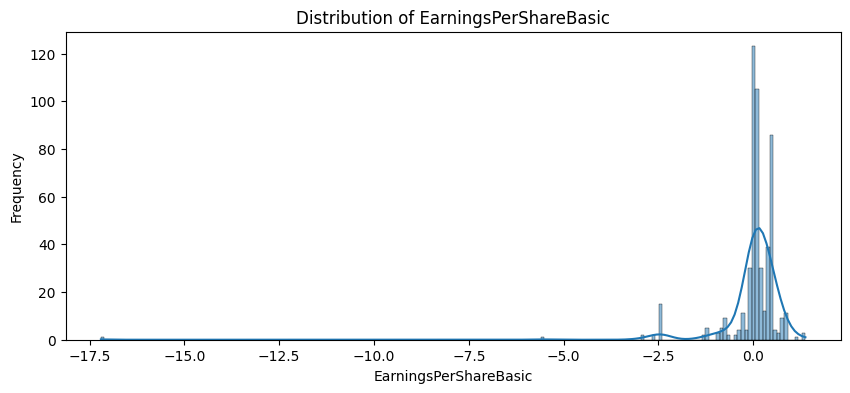

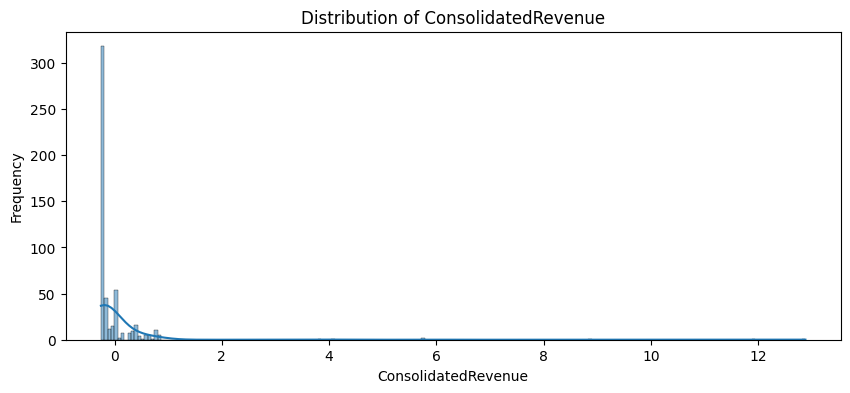

In [43]:
for col in scaled_features_df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(scaled_features_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [44]:
threshold = 3
no_outliers_df = scaled_features_df[(scaled_features_df.abs() < threshold).all(axis=1)]
no_outliers_df

,CostOfGoodsAndServicesSold,GrossProfit,OperatingExpenses,ResearchAndDevelopmentExpense,SellingGeneralAndAdministrativeExpense,OperatingIncomeLoss,NetIncomeLoss,EarningsPerShareBasic,ConsolidatedRevenue
0,-0.225253,-0.244567,-0.395455,-0.269258,-0.469390,-0.164764,-0.164798,0.109700,-0.239608
1,-0.225253,-0.244567,-0.395455,-0.269258,-0.469390,-0.164764,-0.164798,0.109700,-0.239608
2,-0.225253,-0.244567,-0.395455,-0.269258,-0.469390,-0.164764,-0.164798,0.109700,-0.239608
3,-0.225846,-0.247149,-0.395455,-0.271342,-0.471607,-0.167734,-0.167579,0.098585,-0.240938
4,-0.225846,-0.247149,-0.395455,-0.271342,-0.471607,-0.167734,-0.167579,0.098585,-0.240938
...,...,...,...,...,...,...,...,...,...
519,-0.229997,-0.274622,-0.436357,-0.279403,-0.524705,-0.188265,-0.186204,-0.486200,-0.253808
520,-0.220874,-0.243825,-0.359145,-0.236924,-0.427695,-0.176211,-0.171363,0.138180,-0.236742
521,-0.213906,-0.229488,-0.320994,-0.242820,-0.359380,-0.187103,-0.182263,-0.004221,-0.227190
522,-0.189140,0.046226,0.272380,0.024936,-0.051051,-0.083780,-0.098157,0.150683,-0.107993


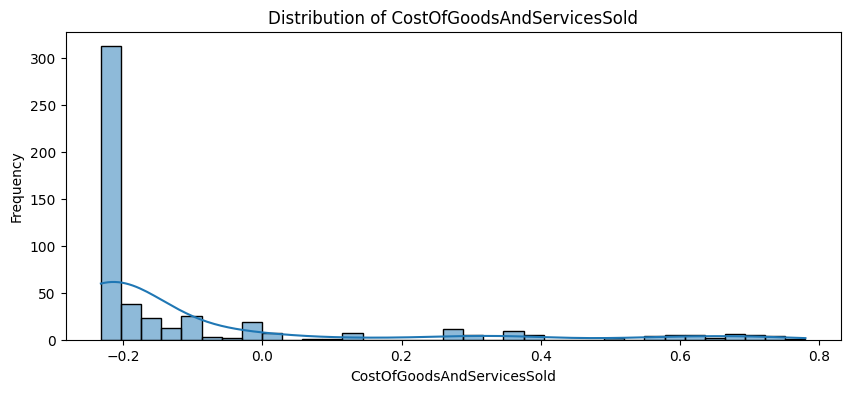

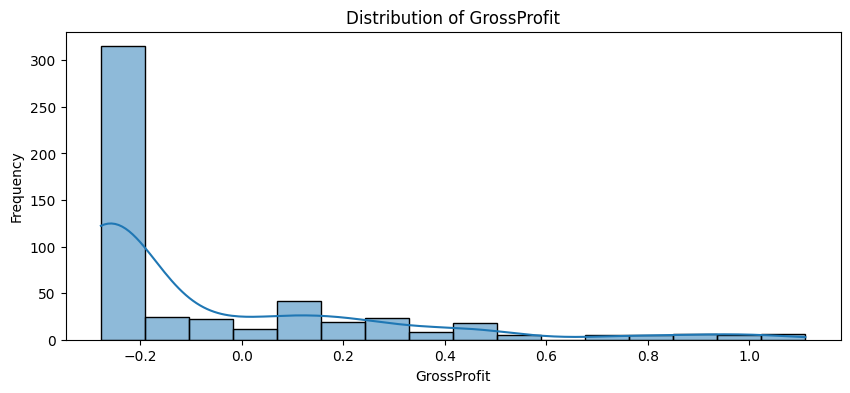

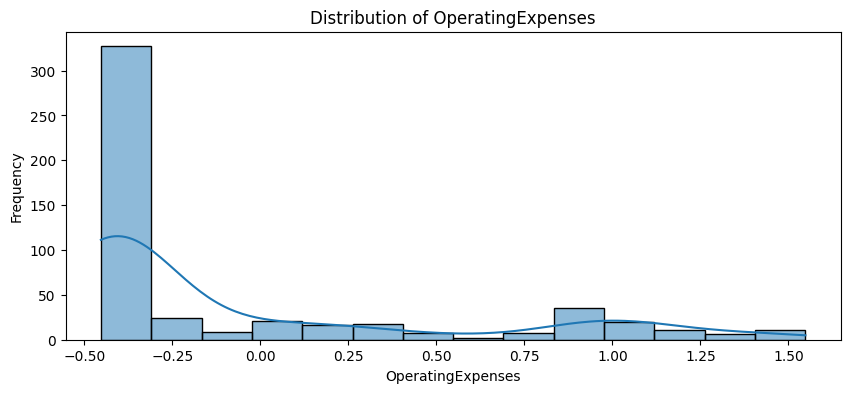

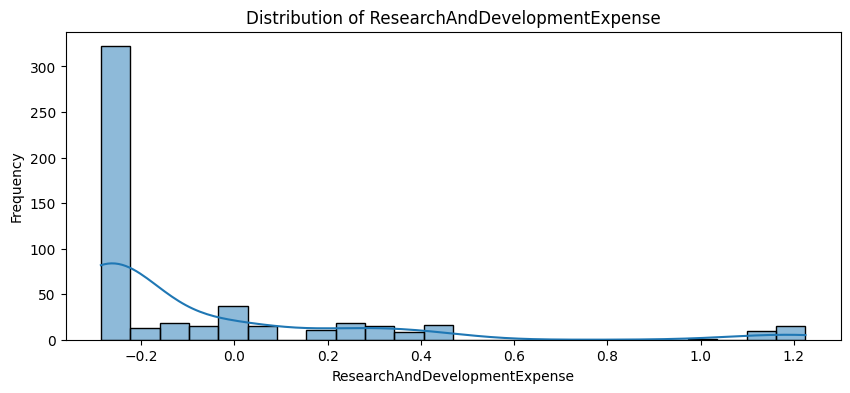

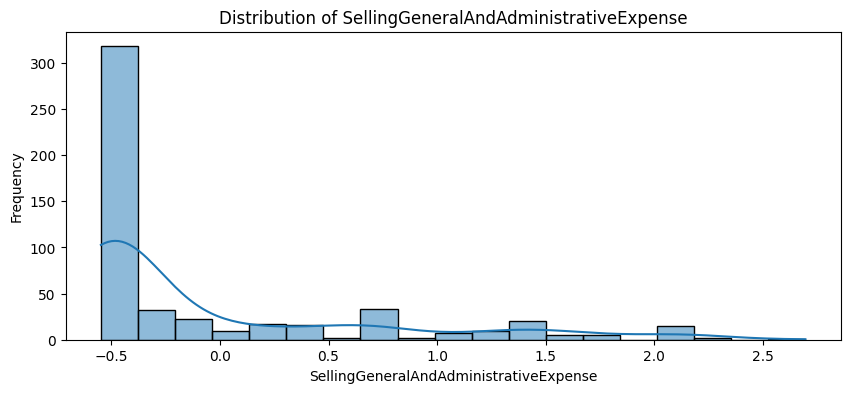

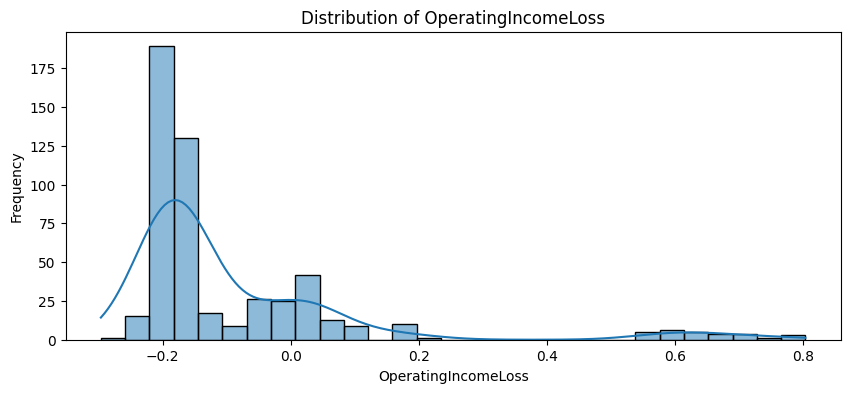

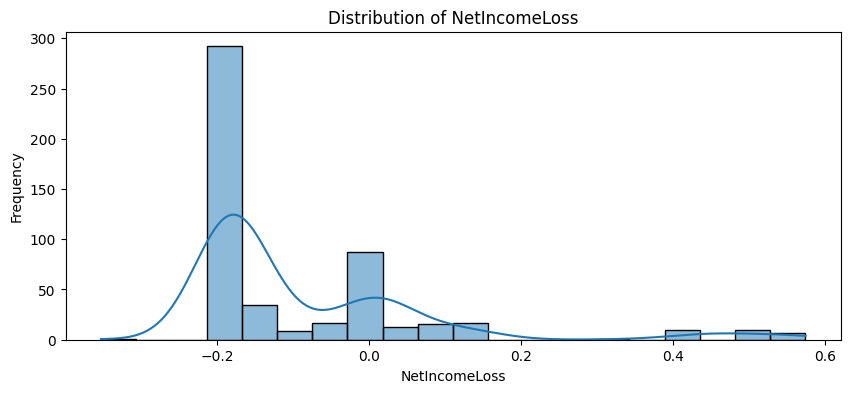

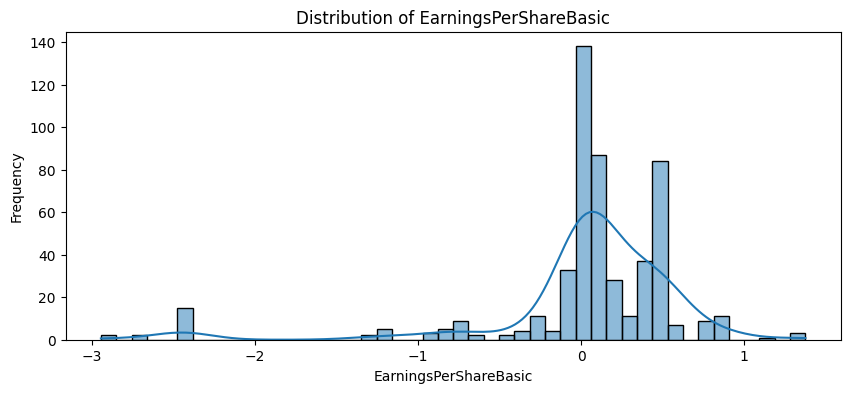

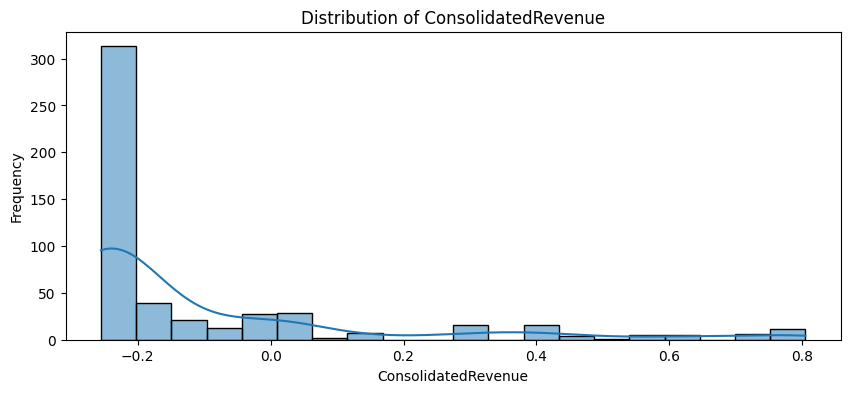

In [46]:
for col in no_outliers_df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(no_outliers_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### **Dimensionality Reduction with PCA**

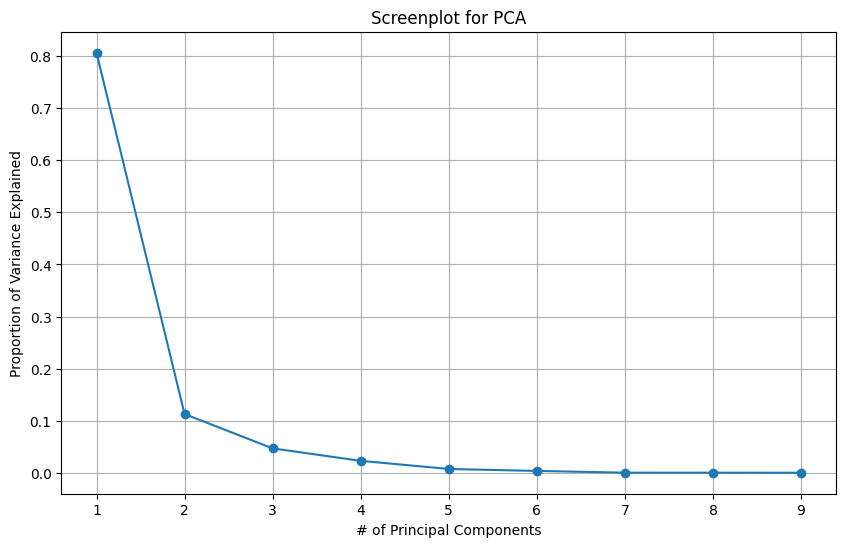

,Principal Component,Percent of Variance Explained,Cumulative Percent
0,1,0.806536,0.806536
1,2,0.112715,0.919251
2,3,0.046783,0.966034
3,4,0.022877,0.988911
4,5,0.007266,0.996178
5,6,0.003488,0.999666
6,7,0.000165,0.999831
7,8,0.000106,0.999937
8,9,0.000063,1.000000


In [33]:
# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_features)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Creating a scree plot to visualize the variance explained by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker = 'o', linestyle='-')
plt.title('Screenplot for PCA')
plt.xlabel('# of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.show()

# Variance explained by principal component dataframe
explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance) + 1),
    'Percent of Variance Explained': explained_variance,
    'Cumulative Percent': np.cumsum(explained_variance)})
explained_variance_df

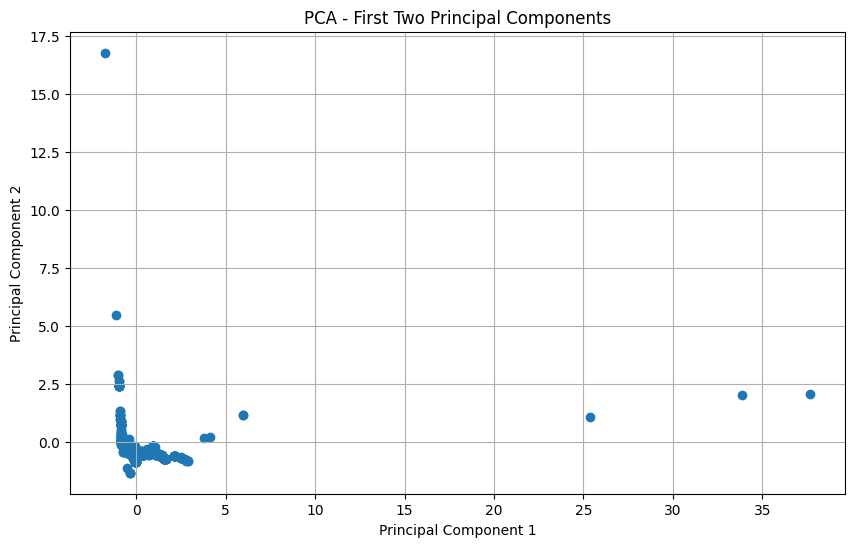

In [34]:
# Visualizing the data in the reduced dimensional space (first two principal components)
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Absolutely! Let's reframe our analysis in a first-person perspective, suitable for an informative and explorative blog post about my exploratory data analysis project.

---

### Unveiling Insights with PCA: My EDA Journey

In my latest exploratory data analysis project, I embarked on a fascinating journey to unravel the hidden patterns in a dataset using Principal Component Analysis (PCA). The dataset, rich in financial metrics, presented a perfect opportunity to dive deep into the world of dimensionality reduction.

#### The Power of PCA in My Analysis
1. **Capturing the Essence**: The first step in my PCA adventure involved standardizing the numerical features to ensure a level playing field for all variables. I then applied PCA and discovered that the first principal component alone encapsulated a whopping \(80.65\%\) of the dataset's variance! It was a moment of revelation, showing how a single component could hold so much information.

2. **A Deeper Dive**: Not stopping there, I explored further. The second and third components added \(11.27\%\) and \(4.68\%\) to the variance explained, respectively. Together, these three components brought over \(96\%\) of the dataset's variance into my grasp, a significant achievement in reducing dimensions while retaining the core information.

#### Visualizing the Complexity
I ventured into visualizing these findings through a scree plot. This plot, with its characteristic elbow shape, reaffirmed the diminishing returns in variance with additional components beyond the first few. To make these abstract numbers more tangible, I created a 2D scatter plot using the first two principal components. The plot, while not showing distinct clusters, painted a picture of how the data was distributed in this new, reduced-dimensional space.

#### Reflections and Insights
- **The Dominance of the First Component**: This finding hinted at a strong pattern or trend within the dataset, possibly tied to a key financial metric or a combination of correlated features.
- **The Subtlety of Clusters**: The absence of clear clusters in the 2D PCA plot suggested a more nuanced relationship within the data, not defined by clear-cut separations.
- **The Bigger Picture**: My PCA results provided a simplified yet comprehensive view of the dataset, ideal for understanding the overall structure and relationships between features.

### Looking Ahead: Beyond PCA
As enlightening as the PCA analysis was, it left me curious about the dataset's more complex structures and potential clusters. To delve deeper into these aspects, I plan to apply t-SNE, a technique renowned for its ability to uncover non-linear relationships and hidden clusters. This next step will not only complement my PCA findings but also offer a new lens to view the data, making my exploratory journey even more enriching.

Stay tuned as I continue to unravel the mysteries within this dataset, comparing the linear elegance of PCA with the intricate depths of t-SNE!

---

Feel free to let me know if there's a specific direction or detail you'd like me to include or explore further in the context of this blog-style exploration of your data.

### **Dimensionality Reduction with t-SNE**

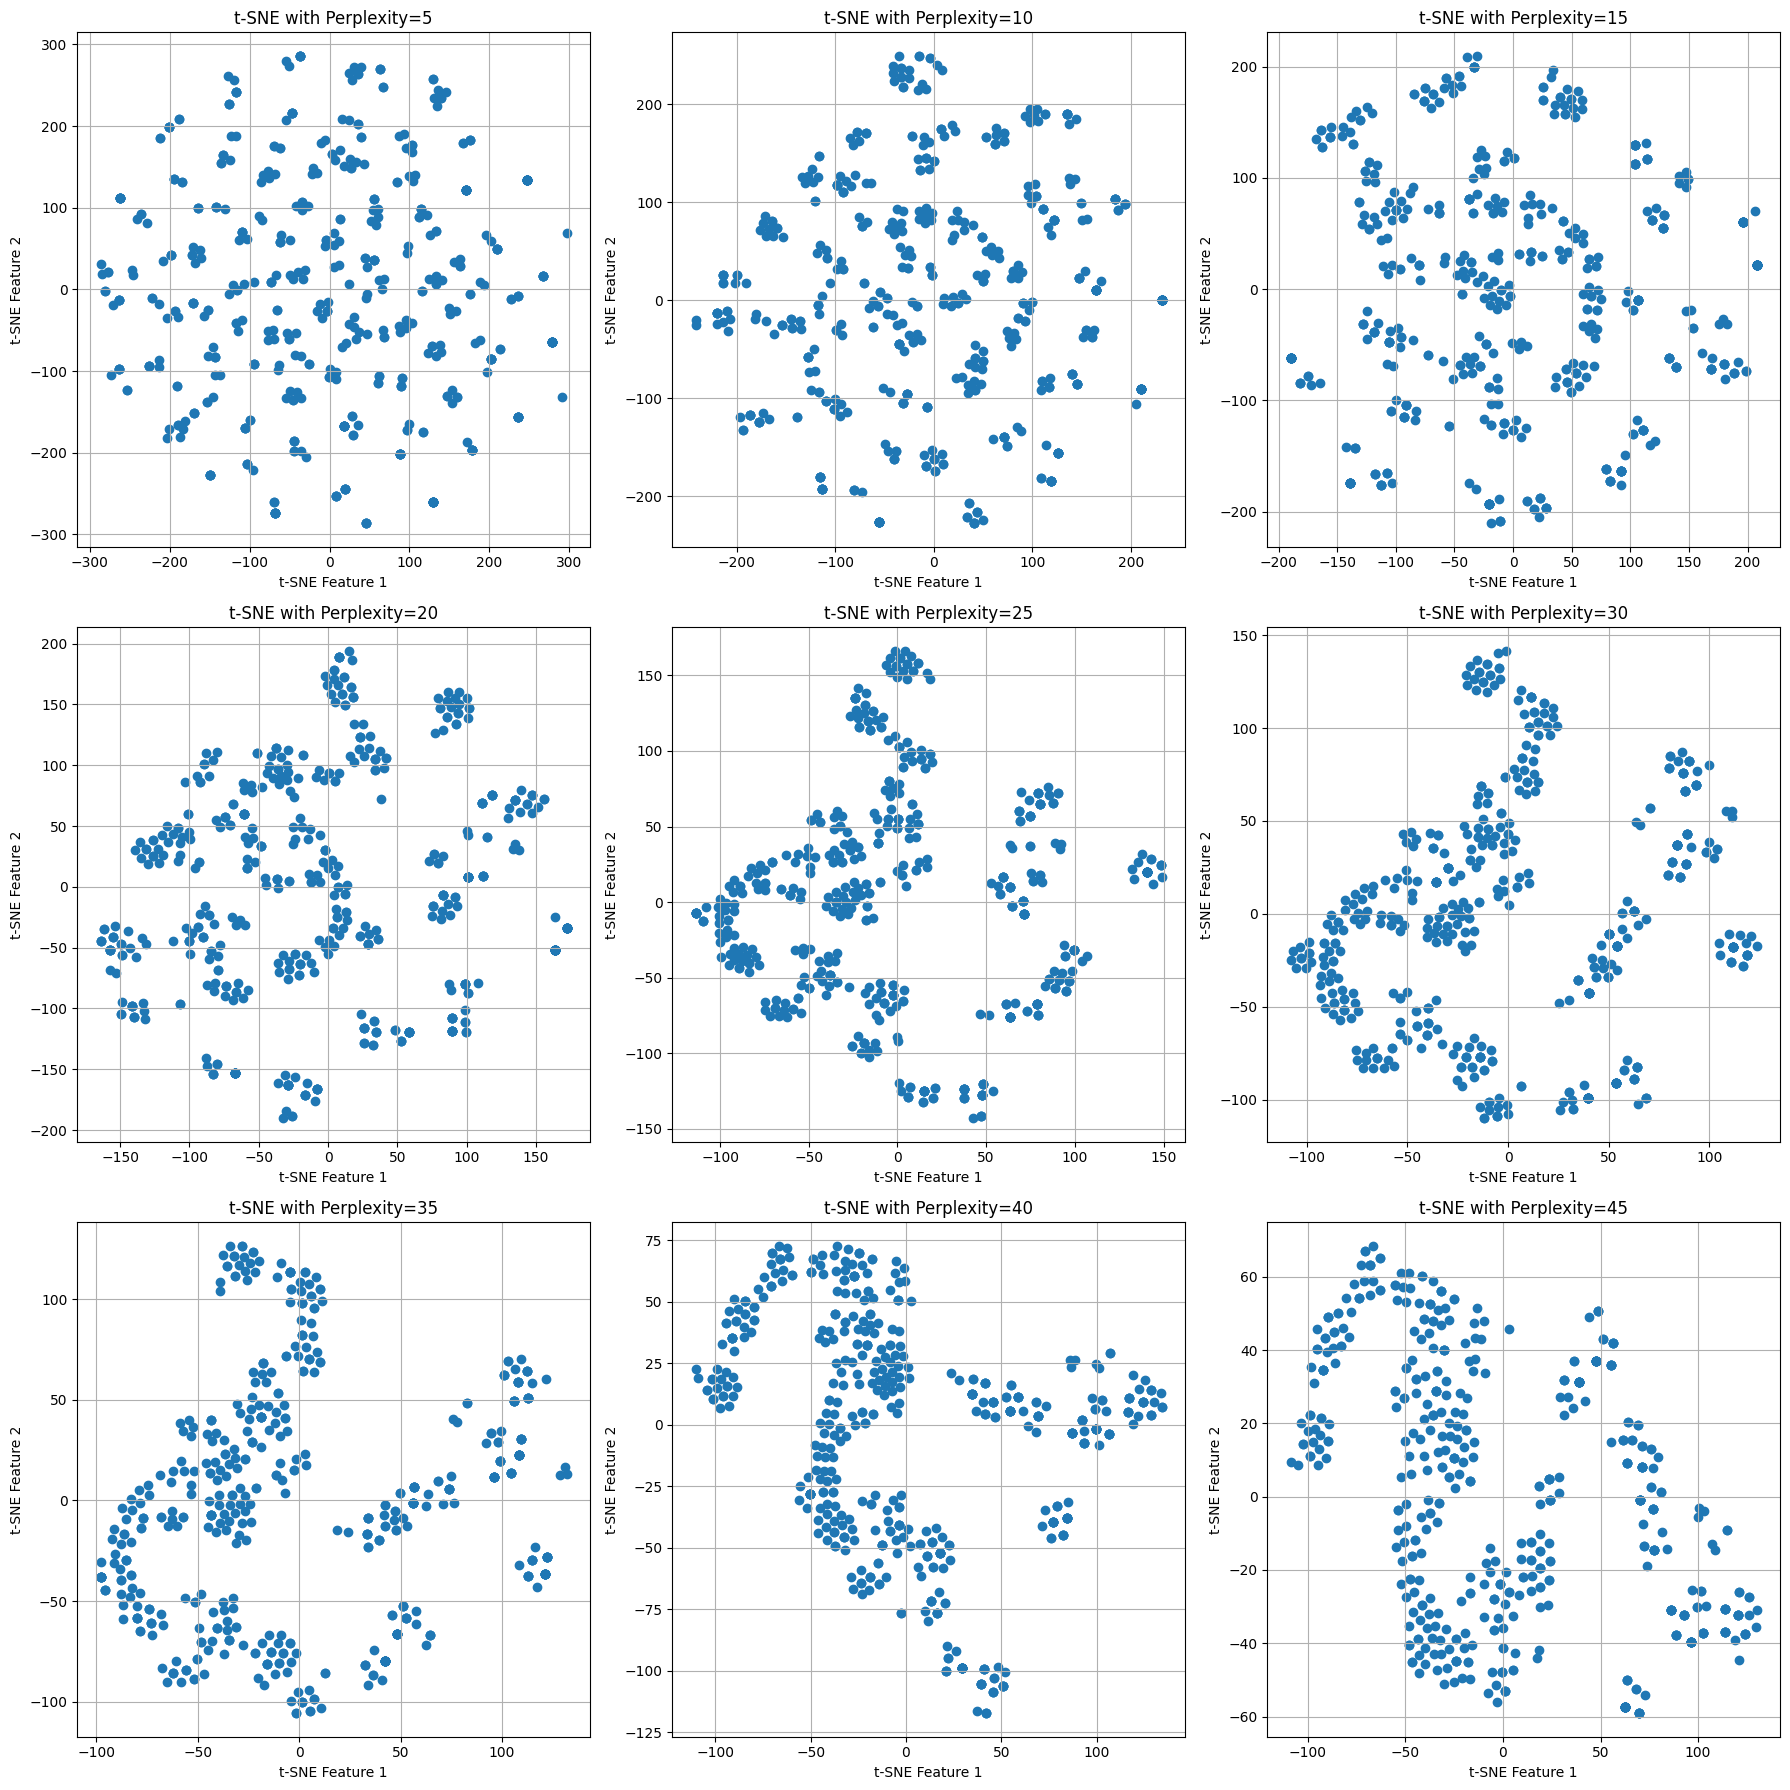

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Applying t-SNE with different perplexity values
perplexities = [5, 10, 15, 20, 25, 30, 35, 40, 45]
tsne_results = {}

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    tsne_results[perplexity] = tsne.fit_transform(scaled_features)

# Plotting the results of t-SNE for each perplexity value
plt.figure(figsize=(18, 18))
for i, perplexity in enumerate(perplexities):
    plt.subplot(3, 3, i+1)
    plt.scatter(tsne_results[perplexity][:, 0], tsne_results[perplexity][:, 1])
    plt.title(f't-SNE with Perplexity={perplexity}')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')
    plt.grid(True)

plt.tight_layout()
plt.show()


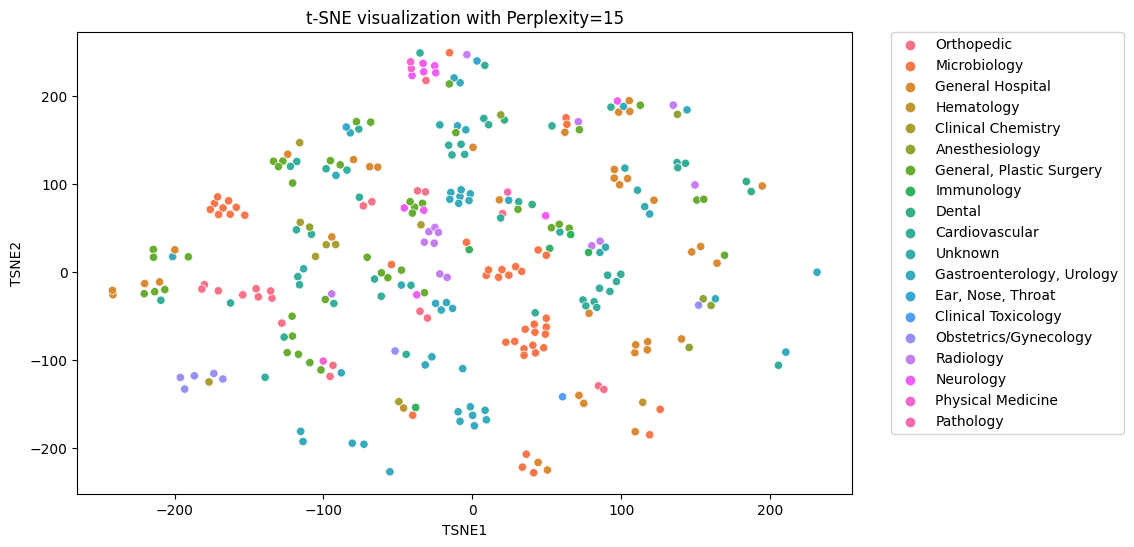

In [42]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=10, random_state=0)
tsne_results = tsne.fit_transform(scaled_features)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['advisory_committee_description'] = df['advisory_committee_description']

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='advisory_committee_description', data=tsne_df)
plt.title('t-SNE visualization with Perplexity=15')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


## **Project Report**